In [1]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from scipy.linalg import expm
from numpy.linalg import *
from scipy.signal import lfilter
%matplotlib inline

In [2]:
def fileO(x,y,filename):
    f = open(filename,'w');
    #f = open(filename,'a'); # overwrite
    for i in range(len(y)):
        f.write('%.4e\t%.4e\n'%(x[i],y[i]));
    f.close();

In [3]:
def fileI(filename):
    tmp = []
    f = open(filename,'r');
    lines = f.readlines()
    for line in lines:
        tmp.append(line);
    out=np.zeros([len(tmp),2]);
    for i in range(len(out)):
        out[i,:] = np.array(tmp[i].split()).astype(np.float64)
    return out;

In [4]:
# SDOF Transient Response (ISO 18431-4)
# th_in : acceleration time history at base
# th_out : acceleration time history at mass
def SDOF_ISO(th_in,dt,fn,zeta):

    wn = 2*np.pi*fn;
    wd = wn*np.sqrt(1-zeta**2);
    A=wn*dt*zeta;
    B=wd*dt;
    
    a, b = np.zeros(3), np.zeros(3);

    b[0] = 1 - np.exp(-A)*np.sin(B)/B;
    b[1] = 2*np.exp(-A)*(np.sin(B)/B - np.cos(B));
    b[2] = np.exp(-2*A) - np.exp(-A) * np.sin(B)/B;

    a[0] = 1;
    a[1] = -2*np.exp(-A)*np.cos(B);
    a[2] = np.exp(-2*A);

    th_out=lfilter(b, a, th_in, axis=-1, zi=None);
    
    return th_out;

In [5]:
## SRS (ISO 18431-4)
def srs_iso(ft,th,dr,dt):
    nf = len(ft);
    rs = np.zeros(nf);
    for i in range(nf):
        rs[i]= max(abs(SDOF_ISO(th,dt,ft[i],dr)));
    return ft,rs;

In [6]:
ndof = 10;

In [7]:
M = 100*identity(ndof+1)

In [8]:
M[ndof,ndof] = 1e12;

In [9]:
K = np.zeros([ndof+1,ndof+1]);

In [10]:
kk = np.array([[1,-1],[-1,1]]);

In [11]:
for i in range(ndof):
    K[i:i+2,i:i+2] += kk;

In [12]:
K *= 1e6

In [13]:
MK = inv(M)@K

In [14]:
eigenvalues, eigenvectors =eig(MK)

In [15]:
w = np.sqrt(abs(eigenvalues));
fn = w/(2*np.pi);

In [16]:
for i in range(ndof+1):
    print('f%d = %.4f \n'%(i+1,fn[ndof-i]));

f1 = 0.0000 

f2 = 2.3787 

f3 = 7.0831 

f4 = 11.6292 

f5 = 15.9155 

f6 = 19.8463 

f7 = 23.3338 

f8 = 26.3000 

f9 = 28.6787 

f10 = 30.4168 

f11 = 31.4755 



In [17]:
gth = fileI('elcentro.dat');
dt = gth[1,0] - gth[0,0];

In [18]:
ft = np.logspace(-1,2,100); damp=1/20;

In [19]:
freq,rs_iso = srs_iso(ft,gth[:,1],damp,dt);

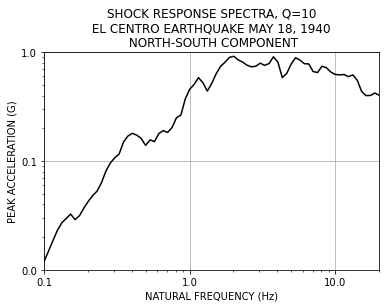

In [20]:
plt.plot(freq,rs_iso,'k-');
plt.xscale('log'); plt.yscale('log');
plt.xlim([0.1,20]); plt.ylim([0.01,1]);
plt.title('SHOCK RESPONSE SPECTRA, Q=10\n EL CENTRO EARTHQUAKE MAY 18, 1940 \n NORTH-SOUTH COMPONENT');
plt.xlabel('NATURAL FREQUENCY (Hz)');
plt.ylabel('PEAK ACCELERATION (G)');
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f')); 
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'));
plt.grid();

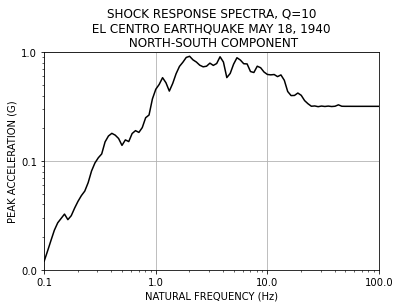

In [21]:
plt.plot(freq,rs_iso,'k-');
plt.xscale('log'); plt.yscale('log');
plt.xlim([0.1,100]); plt.ylim([0.01,1]);
plt.title('SHOCK RESPONSE SPECTRA, Q=10\n EL CENTRO EARTHQUAKE MAY 18, 1940 \n NORTH-SOUTH COMPONENT');
plt.xlabel('NATURAL FREQUENCY (Hz)');
plt.ylabel('PEAK ACCELERATION (G)');
plt.gca().xaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f')); 
plt.gca().yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'));
plt.grid();

In [22]:
fzpa = 20;